# Initial Exploration

The Book-Crossing dataset comprises 3 files.

Users:
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.

Books:
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.

Ratings:
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

<p style="font-size:small;">
Original dataset: <a href="https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/code" target="_blank">Kaggle – Recommendation Dataset</a>
</p>


In [1]:
import pandas as pd

#Load the data

books = pd.read_csv('../data/Books.csv', low_memory=False) # Solved Warning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
users = pd.read_csv('../data/Users.csv')
ratings = pd.read_csv('../data/Ratings.csv')



# I.Books

In [2]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


## ISBN 
<h3>ISBN Format Illustration</h3>
<p>The parts of a 13-digit ISBN include (10-digit ISBN - prefix element is missing):</p>
<ol>
  <li><em>A prefix element</em> – a GS1 prefix: so far 978 or 979 have been made available by GS1.</li>
  <li><em>The registration group element</em> – represents a language-sharing country group, individual country, or territory.</li>
  <li><em>The registrant element</em> – identifies the specific publisher.</li>
  <li><em>The publication element</em> – identifies the specific title or edition.</li>
  <li><em>A checksum character</em> – a check digit used for error detection.</li>
</ol>
<img src="../figures/isbn_wiki.png" alt="ISBN Structure" width="200">


<p style="font-size:small;">
Source: <a href="https://en.wikipedia.org/wiki/ISBN" target="_blank">Wikipedia – ISBN</a>
</p>


<h3>Component Usefulness for Our Analysis</h3>

<ol>
  <li><em>Prefix element</em> – <strong>Not relevant</strong>, as it only applies to 13-digit ISBNs, which are not present in this dataset.</li>
  <li><em>Registration group element (Group)</em> – <strong>Useful</strong>. Can help infer language or regional origin of the book or author.</li>
  <li><em>Registrant element (Publisher)</em> – <strong>Not so useful</strong>. The dataset already includes a Publisher column, may offer value for validation.</li>
  <li><em>Publication element (Title)</em> – <strong>Useful</strong>. Helps differentiate editions of the same book and is core to uniquely identifying a title.</li>
  <li><em>Checksum character (Check digit)</em> – <strong>Not relevant</strong> for recommendation tasks. However, it’s <strong>useful</strong> for checking ISBN validity.</li>
</ol>

In [4]:
# Check length of each ISBN
books['isbn_length'] = books['ISBN'].astype(str).str.len()
print(books['isbn_length'].value_counts().sort_index())

isbn_length
10    271356
11         1
13         3
Name: count, dtype: int64


In [5]:
# Filter ISBNs with length 11 or 13
nonstandard_isbns = books[books['isbn_length'].isin([11, 13])]
print(nonstandard_isbns[['ISBN', 'isbn_length', 'Book-Title']])
books = books.drop(nonstandard_isbns.index)

                 ISBN  isbn_length  \
111808   0486404242\t           11   
171206  3518365479<90           13   
251424  3442248027  3           13   
251649  0385722206  0           13   

                                               Book-Title  
111808  War in Kind: And Other Poems (Dover Thrift Edi...  
171206            Suhrkamp TaschenbÃ?Â¼cher, Nr.47, Frost  
251424                        Diamond Age. Die Grenzwelt.  
251649  Balzac and the Little Chinese Seamstress : A N...  


#### ISBN mostly with length 10
Only 4 ISBNs have a nonstandard length — likely due to typos such as slashes, angle brackets, or extra spaces. These can be manually corrected, removed, or retained with a warning flag depending on downstream needs.

In [6]:
# Ensure ISBN is treated as a clean string
books['ISBN_str'] = books['ISBN'].astype(str).str.strip()

# Check if ISBN is composed only of digits
books['isbn_is_numeric'] = books['ISBN_str'].str.match(r'^\d+$')

# Count how many are numeric vs non-numeric
print(books['isbn_is_numeric'].value_counts())

# Display the non-numeric ones
non_numeric_isbns = books[~books['isbn_is_numeric']]
print(non_numeric_isbns[['ISBN', 'Book-Title']].head(10))


isbn_is_numeric
True     249026
False     22330
Name: count, dtype: int64
           ISBN                                         Book-Title
9    074322678X            Where You'll Find Me: And Other Stories
11   080652121X  Hitler's Secret Bankers: The Myth of Swiss Neu...
40   038078243X                   Miss Zukas and the Raven's Dance
41   055321215X                                Pride and Prejudice
42   067176537X  The Therapeutic Touch: How to Use Your Hands t...
48   042518630X                                    Purity in Death
66   042511774X                                  Breathing Lessons
82   087113375X  Modern Manners: An Etiquette Book for Rude People
105  067976397X                       Corelli's Mandolin : A Novel
139  038572179X                                Atonement : A Novel


#### Check Digit Validity: Why ‘X’ at the End Is Not a Mistake

"In the case of the check digit, the last digit of the ISBN, the upper case X can appear. The method of determining the check digit for the ISBN is the modulus 11 with the weighting factors 10 to 1. The Roman numeral X is used in lieu of 10 where ten would occur as a check digit."

<p style="font-size:small;">
Source: <a href="https://www.isbn.org/faqs_general_questions#:~:text=The%20method%20of%20determining%20the,occur%20as%20a%20check%20digit." target="_blank">ISBN - FAQ</a>
</p>

In [7]:
# ISBNs including X at the end
books['isbn_ends_with_x'] = books['ISBN_str'].str.match(r'^\d{9}[Xx]$')

# Match completely numeric ISBNs (valid)
books['isbn_is_numeric'] = books['ISBN_str'].str.match(r'^\d+$')

# Flag invalid ISBNs: not numeric and not ending with X
books['isbn_invalid'] = ~(books['isbn_is_numeric'] | books['isbn_ends_with_x'])

# Count the groups
print("Numeric ISBNs:", books['isbn_is_numeric'].sum())
print("ISBNs ending with X:", books['isbn_ends_with_x'].sum())
print("Invalid ISBNs:", books['isbn_invalid'].sum())

# Display some invalid ones
invalid_isbns = books[books['isbn_invalid']]
print(invalid_isbns[['ISBN', 'Book-Title']].head(10))


Numeric ISBNs: 249026
ISBNs ending with X: 22216
Invalid ISBNs: 114
             ISBN                                         Book-Title
6291   B00009ANY9                                         Cane River
10272  B0000A2U93                                           Carmilla
11185  B0000633PU        The Story of Aladdin and the Wonderful Lamp
13862  B00007FYKO  Bloodcurdling Tales of Horror and the Macabre:...
13865  B00009APKU                                          Moby Dick
15815  B00008NRHQ                                   Mystic Rose, The
16101  B0000DAPP1  Discover Your Genius: How to Think Like Histor...
26220  B000069F44                               The Lady in the Lake
26228  B00005NCS7                              Moonlight Becomes You
28297  B00007MAM9                                      The Green Ray


#### B00009ANY9, B0000A2U93, B0000633PU - likely different (Non-ISBN) identifiers

ChatGPT: It looks like Amazon Standard Identification Number (ASIN)

The ASIN is a ten-digit alphanumeric product identification number assigned to each product once it is uploaded and listed for sale on Amazon. It serves as a unique product identifier, similar to the ISBN for books, but without international standardization. Amazon uses ASINs to identify, catalog, and sort products. Here's an example ASIN: B07PY42BRC.

<p style="font-size:small;">
Source: <a href="https://www.amalytix.com/en/knowledge/controlling/amazon-standard-identification-number-asin/" target="_blank">Amalytix – ASIN</a>
</p>


In [8]:
# Identify potential ASINs (common pattern: starts with 'B' or 'b')
books['isbn_is_asin'] = books['ISBN_str'].str.match(r'^[Bb].*$') 

# Everything else that's invalid and not ASIN is considered 'other invalid'
books['isbn_invalid_other'] = books['isbn_invalid'] & ~books['isbn_is_asin']

# Summary of all groups
print("Numeric ISBNs:", books['isbn_is_numeric'].sum())
print("ISBNs ending with X:", books['isbn_ends_with_x'].sum())
print("Likely ASINs:", books['isbn_is_asin'].sum())
print("Other Invalid ISBNs:", books['isbn_invalid_other'].sum())

Numeric ISBNs: 249026
ISBNs ending with X: 22216
Likely ASINs: 114
Other Invalid ISBNs: 0


#### Validate checksum for numeric ISBNs and those ending in X
According to the 2001 edition of the International ISBN Agency's official user manual, the ISBN-10 check digit (which is the last digit of the 10-digit ISBN) must range from 0 to 10 (the symbol 'X' is used for 10), and must be such that the sum of the ten digits, each multiplied by its (integer) weight, descending from 10 to 1, is a multiple of 11.
That is, if <i>x<sub>i</sub></i> is the <i>i<sup>th</sup></i> digit, then <i>x<sub>10</sub></i> must be chosen such that:

<p style="text-align: center;"> ∑<sub>i=1</sub><sup>10</sup> (11 − i) · x<sub>i</sub> ≡ 0 (mod 11) </p>
<p style="font-size:small;"> Source: <a href="https://en.wikipedia.org/wiki/ISBN#ISBN-10_check_digits" target="_blank">Wikipedia – ISBN-10 Check Digits</a> </p>


In [9]:
# Keep only valid numeric 10-digit ISBNs
num_isbn10 = books[books['isbn_is_numeric']].copy()  # make a safe copy
num_isbn10['ISBN_str'] = num_isbn10['ISBN'].astype(str)

# Compute checksum using ISBN-10 formula:
# ∑(digit × weight) where weights go from 10 to 1
def isbn10_checksum(isbn):
    total = sum((10 - i) * int(d) for i, d in enumerate(isbn))
    return total % 11 == 0

# Apply checksum
num_isbn10['checksum_num'] = num_isbn10['ISBN_str'].apply(isbn10_checksum)

# Summary
print("Valid ISBN-10 checksums:", num_isbn10['checksum_num'].sum())
print("Invalid ISBN-10 checksums:", (~num_isbn10['checksum_num']).sum())


Valid ISBN-10 checksums: 249026
Invalid ISBN-10 checksums: 0


In [10]:
# ISBNs ending with X or x
isbn_with_x = books[books['isbn_ends_with_x']].copy()  # keep rows where this is True

isbn_with_x['ISBN_str'] = isbn_with_x['ISBN'].astype(str)

def isbn10_x_checksum(isbn):
    total = sum((10 - i) * (10 if d in ['X', 'x'] else int(d)) for i, d in enumerate(isbn))
    return total % 11 == 0

# Apply checksum
isbn_with_x['checksum_x'] = isbn_with_x['ISBN_str'].apply(isbn10_x_checksum)

# Summary
print("Valid ISBN-10 checksums:", isbn_with_x['checksum_x'].sum())
print("Invalid ISBN-10 checksums:", (~isbn_with_x['checksum_x']).sum())

Valid ISBN-10 checksums: 22216
Invalid ISBN-10 checksums: 0


#### All valid-format ISBN-10 entries passed the checksum validation.


In [11]:
# Total number of ISBNs
total_isbns = books['ISBN'].nunique()
total_rows = len(books)

print(f"Total rows in books: {total_rows}")
print(f"Unique ISBNs: {total_isbns}")

Total rows in books: 271356
Unique ISBNs: 271356


#### ISBN as a Unique Identifier

We verified that each ISBN in the `books` table is unique, indicating that the column can function as a primary key for the dataset.


## Book-Title 
Although .info() shows no null entries, we manually check for other forms of missing or low-quality titles

In [12]:
# Convert Book-Title to string and lowercase
title_cleaned = books['Book-Title'].astype(str).str.strip().str.lower()

# Define suspicious placeholder values
suspicious_titles = {'', 'nan', 'unknown', 'none', 'untitled', 'no title', 'na'}

# Boolean mask for suspicious titles
suspicious_mask = title_cleaned.isin(suspicious_titles)

# Count and display the results
print("Suspicious or placeholder titles:", suspicious_mask.sum())
display(books[suspicious_mask][['ISBN', 'Book-Title', 'Book-Author']].head(10))


Suspicious or placeholder titles: 2


,ISBN,Book-Title,Book-Author
38603,0747275637,Untitled,Bill Napier
256455,0434008788,Untitled,Neal Stephenson


In [13]:
books['Book-Title'].sample(10, random_state=36)

176510             Polaris and Other Stories (King Penguin)
130411    The Cambridge Companion to Old English Literat...
38349     Good Night, Little Grover (Sesame Street Muppe...
78396     Cracking the Da Vinci Code : The Unauthorized ...
230035               Immortality Funerary Rites and Customs
157920                             The Works of Oscar Wilde
162557                          LeTour du Monde en 80 Jours
264538                          Death in the Dark Continent
109007                                     Paul J. Stankard
178661    The Fisherman's Little Instruction Book (Littl...
Name: Book-Title, dtype: object

### Lord of The Rings

In [14]:
# Convert to lowercase for case-insensitive match
matches = books[books['Book-Title'].str.lower().str.contains("lord of the rings", na=False)]

# Display matching books
print(matches[['Book-Title', 'Book-Author']].head(20))


                                              Book-Title       Book-Author
91     El Senor De Los Anillos: LA Comunidad Del Anil...  J. R. R. Tolkien
92     El Senor De Los Anillos: Las DOS Torres (Lord ...  J. R. R. Tolkien
93     El Senor De Los Anillos: El Retorno Del Rey (T...  J. R. R. Tolkien
780       The Two Towers (The Lord of the Rings, Part 2)    J.R.R. TOLKIEN
1571   The Fellowship of the Ring (The Lord of the Ri...    J.R.R. TOLKIEN
3354   The Hobbit : The Enchanting Prelude to The Lor...    J.R.R. TOLKIEN
4206   The Return of the King (The Lord of the Rings,...    J.R.R. TOLKIEN
4514   The Fellowship of the Ring (Lord of the Rings ...  J. R. R. Tolkien
6060             The Lord of the Rings (Movie Art Cover)    J.R.R. Tolkien
6866                The Hobbit and The Lord of the Rings    J.R.R. TOLKIEN
11083            The Lord of the Rings (Movie Art Cover)  J. R. R. Tolkien
12761  The Return of the King (The Lord of The Rings,...  J. R. R. Tolkien
12762     The Two Towers 

#### Various book editions in various languages
“Lord of the Rings” and other books or series may appear in multiple times in different naming formats.

## Book-Author
Two Null Entries due .info()

In [15]:
# Normalize and check for problematic author entries
placeholder_authors = ['nan', 'unknown', 'unk', 'n/a', 'none', 'na']

# Convert to lowercase, strip whitespace
author_cleaned = books['Book-Author'].astype(str).str.strip().str.lower()

# Create mask for problematic authors
invalid_author_mask = (
    books['Book-Author'].isna() |  # actual NaN
    (author_cleaned == "") |       # empty string
    author_cleaned.isin(placeholder_authors)
)

# Count and show the problematic rows
print("Problematic Book-Author entries at least:", invalid_author_mask.sum())
books.loc[invalid_author_mask, ['ISBN', 'Book-Title', 'Book-Author']].head(10)


Problematic Book-Author entries at least: 55


,ISBN,Book-Title,Book-Author
15246,0380804174,Elizabeth,Unknown
23866,0671456393,PICK UP STICKS,Unknown
43834,8430575456,Cocina Para Ninos,Unk
44868,0920269028,"Stitch by Stitch: A Home Library of Sewing, Kn...",Unknown
46512,0134681584,San Francisco (Insight Guide San Francisco),Unknown
59372,0671826859,GHOST STY,Unknown
61904,0671836056,NIGHTWAY,Unknown
62721,0671451162,NEW TERRORS 1,Unknown
65456,0671494260,GENTLE FURY,Unknown
76349,0671472321,STAR TRK WRTH KHAN,Unknown


## Year of Publication
Although there are no null entries, some values can be invalid (not numeric, not realistic year).  


In [16]:
# Clean and normalize the 'Year-Of-Publication' column
year_cleaned = books['Year-Of-Publication'].astype(str).str.strip()

# Check if the year is composed of digits only
books['year_is_numeric'] = year_cleaned.str.isdigit()

# Summary counts
print("Numeric values:", books['year_is_numeric'].sum())
print("Non-numeric values:", (~books['year_is_numeric']).sum())

# Show the non-numeric entries
books[~books['year_is_numeric']].head(10)



Numeric values: 271353
Non-numeric values: 3


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,isbn_length,ISBN_str,isbn_is_numeric,isbn_ends_with_x,isbn_invalid,isbn_is_asin,isbn_invalid_other,year_is_numeric
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN,10,078946697X,False,True,False,False,False,False
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN,10,2070426769,True,False,False,False,False,False
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN,10,0789466953,True,False,False,False,False,False



#### Column Misalignment Probably Due to Malformed CSV

We identified **3 records** where columns appear **shifted** — values intended for one column (e.g., author or publisher) are misassigned due to what is likely a missing comma escape or improper quoting in the original CSV. Can be fixed manually.

In [17]:
# Clean and convert Year-Of-Publication
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(str).str.strip()

# Identify entries that are fully numeric (of any length)
is_fully_numeric = books['Year-Of-Publication'].str.isdigit()

# Convert those to integer
numeric_years = books[is_fully_numeric].copy()
numeric_years['Year-Of-Publication'] = numeric_years['Year-Of-Publication'].astype(int)

# Explore extremes
print("Min Year:", numeric_years['Year-Of-Publication'].min())
print("Max Year:", numeric_years['Year-Of-Publication'].max())

Min Year: 0
Max Year: 2050


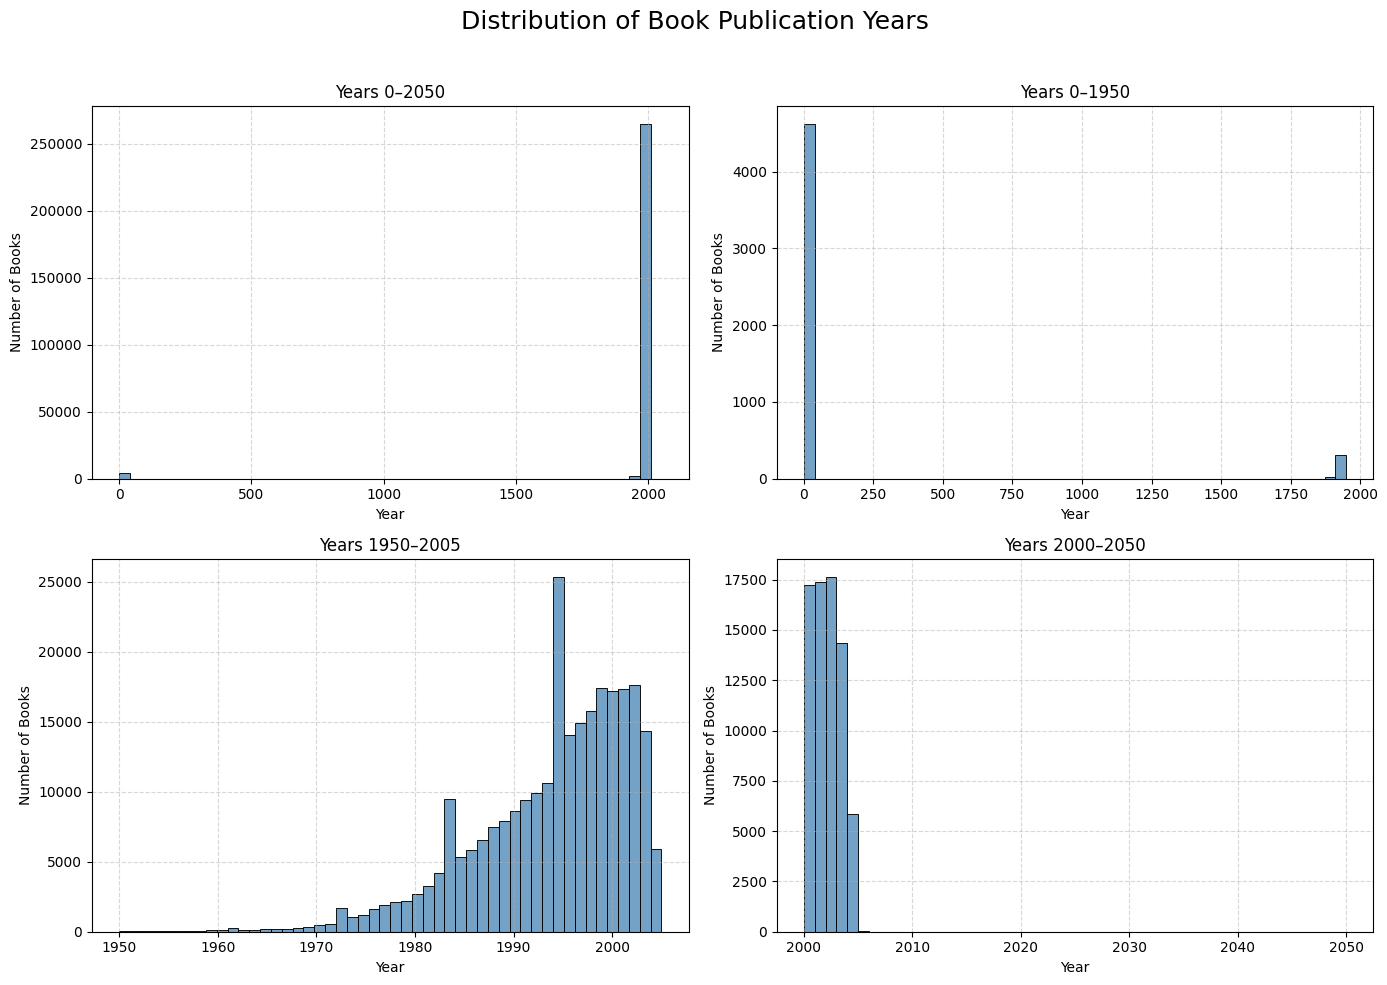

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure numeric publication years
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
numeric_years = books.dropna(subset=['Year-Of-Publication'])

# Filter year ranges
years_0_2050 = numeric_years[numeric_years['Year-Of-Publication'].between(0, 2050)]
years_0_1950 = numeric_years[numeric_years['Year-Of-Publication'].between(0, 1950)]
years_1950_2005 = numeric_years[numeric_years['Year-Of-Publication'].between(1950, 2005)]
years_2000_2050 = numeric_years[numeric_years['Year-Of-Publication'].between(2000, 2050)]

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: 0–2050
sns.histplot(years_0_2050['Year-Of-Publication'], bins=50, kde=False,
             color='steelblue', edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title("Years 0–2050")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Number of Books")
axes[0, 0].grid(True, linestyle='--', alpha=0.5)

# Plot 2: 0–1950
sns.histplot(years_0_1950['Year-Of-Publication'], bins=50, kde=False,
             color='steelblue', edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_title("Years 0–1950")
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel("Number of Books")
axes[0, 1].grid(True, linestyle='--', alpha=0.5)

# Plot 3: 1950–2005
sns.histplot(years_1950_2005['Year-Of-Publication'], bins=50, kde=False,
             color='steelblue', edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title("Years 1950–2005")
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Number of Books")
axes[1, 0].grid(True, linestyle='--', alpha=0.5)

# Plot 4: 2000–2050
sns.histplot(years_2000_2050['Year-Of-Publication'], bins=50, kde=False,
             color='steelblue', edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_title("Years 2000–2050")
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel("Number of Books")
axes[1, 1].grid(True, linestyle='--', alpha=0.5)

# Final formatting
fig.suptitle("Distribution of Book Publication Years", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Publication Year – Interpretation of Anomalies

Based on the histogram and external dataset documentation, we can draw the following conclusions:

- **Year 0** likely represents a **missing value placeholder** — it appears frequently and doesn't correspond to any plausible publication year.
- **Years after 2025** are certainly **erroneous**, as we are currently in 2025.
- Even **years after ~2005** seem suspect. From the histogram, there's a visible drop-off around 2004–2005.
- This aligns with the **dataset's origin**, which was crawled in **August/September 2004**, according to the Kaggle source:

> *“Collected by Cai-Nicolas Ziegler in a 4-week crawl (August / September 2004) from the Book-Crossing community…”*

📎 **Source**: [Kaggle Dataset – Book Recommendation](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset?select=Ratings.csv)



## Publisher

In [19]:
# Show rows with null Publisher
null_publishers = books[books['Publisher'].isnull()]
print(f"Number of books with missing Publisher: {len(null_publishers)}")
display(null_publishers[['ISBN', 'Book-Title', 'Book-Author', 'Publisher']].head())

Number of books with missing Publisher: 2


,ISBN,Book-Title,Book-Author,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,NaN


In [20]:
# Show the "shifted" indices
books[~books['year_is_numeric']][['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,NaN,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,NaN,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,NaN,http://images.amazon.com/images/P/0789466953.0...


In [21]:
# Normalize author surname
books['Book-Author-lower'] = books['Book-Author'].str.lower().str.strip()
books['Author-Surname'] = books['Book-Author-lower'].str.split().str[-1]

# Filter Tolkien books
tolkien_books = books[books['Author-Surname'] == 'tolkien']

# Display relevant columns
tolkien_books[['Book-Title', 'Book-Author', 'Publisher']].drop_duplicates().sort_values('Publisher').head(10)


,Book-Title,Book-Author,Publisher
135853,Bilbo's Last Song: (At the Grey Havens),J. R. R. Tolkien,Alfred A. Knopf
39687,"The Book of Lost Tales, Part 1 (The History of...",J. R. R. Tolkien,Allen &amp; Unwin
264013,The Father Christmas letters,J. R. R Tolkien,Allen &amp; Unwin
10661,The Silmarillion,J. R. R Tolkien,Allen &amp; Unwin
239802,Letters of J.R.R. Tolkien: A selection,J. R. R Tolkien,Allen &amp; Unwin
39683,Unfinished Tales of Numenor and Middle-Earth,J. R. R. Tolkien,"Allen &amp; Unwin Pty., Limited (Australia)"
219929,Mr. Bliss,J. R. R. Tolkien,"Allen &amp; Unwin Pty., Limited (Australia)"
52381,"The Lord of the rings,",J. R. R Tolkien,Allen and Unwin
96792,Beowulf and the Critics (Medieval &amp; Renais...,J. R. R. Tolkien,Arizona Center for Medieval and Renaissance S
6253,The Hobbit,J R R Tolkien,Ballantine Books


In [22]:
# Count number of books by publisher
publisher_counts = (
    tolkien_books['Publisher']
    .dropna()
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Publisher', 'Publisher': 'Tolkien_Book_Count'})
)

# Display result
publisher_counts.head(10)


,Tolkien_Book_Count,count
0,Houghton Mifflin Company,47
1,Houghton Mifflin,44
2,Minotauro,18
3,Not Avail,15
4,Klett-Cotta,13
5,Del Rey,9
6,Del Rey Books,9
7,Ballantine Books,9
8,Distribooks,7
9,Recorded Books,7


## Image-URL-S/M/L

In [23]:
#For the purpose of making the links clickable
from IPython.display import HTML

# Sample
sample_images = books[['ISBN', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']].sample(10).copy()

# Make each URL a clickable link
for col in ['Image-URL-S', 'Image-URL-M', 'Image-URL-L']:
    sample_images[col] = sample_images[col].apply(lambda url: f'<a href="{url}" target="_blank">link</a>')

# Display as HTML
HTML(sample_images.to_html(escape=False))


,ISBN,Image-URL-S,Image-URL-M,Image-URL-L
205061,0444409300,link,link,link
93775,0060106581,link,link,link
175040,0307117456,link,link,link
853,0553574175,link,link,link
25205,0590252194,link,link,link
29301,0140240233,link,link,link
100955,1899866264,link,link,link
219859,0393032566,link,link,link
130768,0451184815,link,link,link
46624,0449001873,link,link,link


#### Missing or Unusable: 
A significant number of images are blank.

#### Redundancy: 
All three columns usually point to the same image, differing only in resolution. Occasionally, one URL might be broken or inconsistent.

#### Theoretical "Out of the Box" Use Case: 
In theory, one could extract visual features from covers and try to classify genres such as fantasy based on training data (not part of this analysis).

#### Potential Use Case: 
These image links will not be used in the recommendation modeling process. However, they could serve a cosmetic purpose — for instance, to visually enrich the user interface by displaying a book's cover alongside its title and author in the final recommendation output.

The link includes hidden ISBNs, which could potentially be used to verify or fill in missing values. However, ISBN is not a problematic feature in this dataset.



# II.Users

In [24]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [25]:
# Check uniqueness of User-ID
is_unique = users['User-ID'].is_unique
print("User-ID is unique:", is_unique)


User-ID is unique: True


In [26]:
users.sample(10, random_state=1)

,User-ID,Location,Age
128583,128584,"glasgow, scotland, united kingdom",46.0
14728,14729,"durban, kwazulu natal, south africa",NaN
73410,73411,"lincoln, england, united kingdom",35.0
43743,43744,"seoul, seoul, south korea",NaN
130478,130479,"fort smith, arkansas, usa",61.0
31672,31673,"los angeles, california, usa",61.0
203254,203255,"seoul, seoul, s.corea",NaN
195566,195567,"san francisco, california, usa",55.0
49769,49770,"montgomery village, maryland, usa",NaN
18974,18975,"winter park, florida, usa",55.0


### User Location Format
The Location field appears to follow the structure: City, Region/State, Country.
The third component (typically the country) is likely the most informative — useful for modeling language or regional preferences.
The other two may have limited value due to inconsistency.
The second component (region/state) is the most ambiguous, as its meaning varies significantly across countries — it may denote a province, state, or even repeat the city name.

Given these issues, extracting and normalizing the country component is likely the most promising preprocessing step

In [27]:
# Count number of commas in each Location
users['comma_count'] = users['Location'].astype(str).str.count(',')

# Check how many have exactly two commas
exactly_two_commas = (users['comma_count'] == 2).sum()
total_users = len(users)

print(f"Locations with exactly two commas: {exactly_two_commas} out of {total_users}")
print(f"Locations with different structure: {total_users - exactly_two_commas}")


Locations with exactly two commas: 277348 out of 278858
Locations with different structure: 1510


In [28]:
# Filter users with location not having exactly two commas
irregular_locations = users[users['comma_count'] != 2]

# Show a random sample of these entries
irregular_locations[['User-ID', 'Location']].sample(10, random_state=1)


,User-ID,Location
107415,107416,"singapore, jakarta, singapore, singapore"
186724,186725,"shah alam, selangor, minnesota, malaysia"
150383,150384,"bishops stortford, herts., england, united kin..."
99630,99631,"auburn, ca, california, usa"
216884,216885,"brandon,mb, manitoba, canada"
57303,57304,"winfield, ab, alberta, canada"
257346,257347,"missoula,, montana, usa"
46235,46236,"austin, texas, texas, usa"
32287,32288,"huntersville, nc, north carolina, usa"
16561,16562,"edmonton,, alberta, canada"


In [29]:
# Ensure string format and strip whitespace
users['Location'] = users['Location'].astype(str).str.strip()

# Extract the last component after the last comma as Country
users['Country'] = users['Location'].apply(lambda loc: loc.split(',')[-1].strip().lower())



In [30]:
# Count number of users per country
country_counts = users['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Num_Users']

# Display all countries with user counts
country_counts.head(10)

,Country,Num_Users
0,usa,139711
1,canada,21658
2,united kingdom,18538
3,germany,17043
4,spain,13147
5,australia,11784
6,italy,11266
7,,4578
8,france,3455
9,portugal,3325


Missing country can be estimated from the City/Province

### Age

Missing age entries: 110762 (39.72%)
Non-missing age entries: 168096 (60.28%)


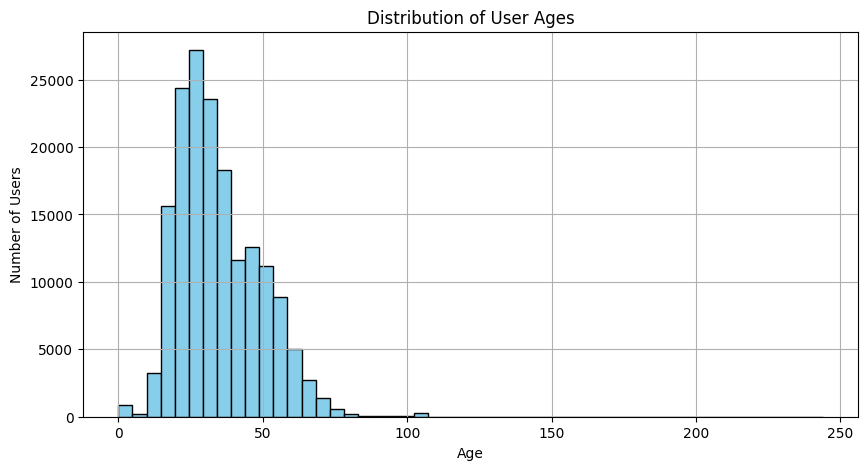

In [31]:
#Identify missing age entries
total_users = len(users)
missing_age_count = users['Age'].isna().sum()
non_missing_age_count = users['Age'].notna().sum()

missing_pct = missing_age_count / total_users * 100
non_missing_pct = non_missing_age_count / total_users * 100

print(f"Missing age entries: {missing_age_count} ({missing_pct:.2f}%)")
print(f"Non-missing age entries: {non_missing_age_count} ({non_missing_pct:.2f}%)")


# Histogram of non-missing, reasonable age values
valid_ages = users['Age'].dropna()
plt.figure(figsize=(10, 5))
plt.hist(valid_ages, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()


In [32]:
# Count number of users per age
age_counts = users['Age'].value_counts().sort_index()
age_counts.head(20)

Age
0.0      416
1.0      288
2.0      105
3.0       45
4.0       28
5.0       26
6.0       18
7.0       27
8.0       54
9.0       62
10.0      84
11.0     121
12.0     192
13.0     885
14.0    1962
15.0    2383
16.0    2570
17.0    3044
18.0    3703
19.0    3950
Name: count, dtype: int64

In [33]:
age_counts.tail(20)

Age
199.0    2
200.0    2
201.0    1
204.0    4
207.0    1
208.0    1
209.0    2
210.0    3
212.0    1
219.0    1
220.0    1
223.0    1
226.0    1
228.0    3
229.0    1
230.0    1
231.0    1
237.0    1
239.0    1
244.0    1
Name: count, dtype: int64

### User Age

Approximately **40% of users have no age information** available. While the feature is missing for a large portion of users, **age can be highly valuable** in tailoring book recommendations — especially for distinguishing between content suitable for children, young adults, and adults readers.

However, simply filling missing ages with an average would be misleading, as it would **consider all unknown users to be adults**.

Smarter strategy - **Behavior-based inference**: The types of books a user interacts with  can offer strong signals about age. (Country or name can also include information about the age)


Instead of trying to predict exact age **classify users into broader age groups** (e.g., child, teen, young adult, adult, senior).


# II.Ratings

In [34]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [35]:
# Total number of ratings
total_ratings = len(ratings)

# Check which User-IDs in ratings do NOT exist in users table
missing_users = ~ratings['User-ID'].isin(users['User-ID'])
missing_users_count = missing_users.sum()
print(f" Ratings with missing users: {missing_users_count} ({missing_users_count / total_ratings:.2%})")

# Check which ISBNs in ratings do NOT exist in books table
missing_books = ~ratings['ISBN'].isin(books['ISBN'])
missing_books_count = missing_books.sum()
print(f" Ratings with missing books: {missing_books_count} ({missing_books_count / total_ratings:.2%})")


 Ratings with missing users: 0 (0.00%)
 Ratings with missing books: 118648 (10.32%)


In [36]:
# Subset of ratings with ISBNs not present in books
missing_book_ratings = ratings[~ratings['ISBN'].isin(books['ISBN'])]

# Count how many times each missing ISBN appears
missing_isbn_counts = missing_book_ratings['ISBN'].value_counts()

# Show top 10 most frequently rated missing books
print(missing_isbn_counts.head(10))

ISBN
0679781587    639
0749397543    160
0552124753    127
0091867770    112
0099387913     95
0552137030     93
0330367358     92
8873122933     88
067697175X     80
0749395990     78
Name: count, dtype: int64


In [37]:
# Count all rating values (0–10)
rating_counts = ratings['Book-Rating'].value_counts().sort_index()

# Total counts
total_ratings = len(ratings)
nonzero_ratings = ratings[ratings['Book-Rating'] != 0]
nonzero_total = len(nonzero_ratings)

# Calculate both percentages
percentage_all = (rating_counts / total_ratings * 100).round(2)
percentage_nonzero = rating_counts.copy().astype(float)
percentage_nonzero[percentage_nonzero.index != 0] = (
    percentage_nonzero[percentage_nonzero.index != 0] / nonzero_total * 100
).round(2)
percentage_nonzero[percentage_nonzero.index == 0] = float('nan')

# Combine into one DataFrame
rating_summary = pd.DataFrame({
    'Count': rating_counts,
    'Percentage (all)': percentage_all,
    'Percentage (nonzero only)': percentage_nonzero
})

# Display
print(rating_summary)

              Count  Percentage (all)  Percentage (nonzero only)
Book-Rating                                                     
0            716109             62.28                        NaN
1              1770              0.15                       0.41
2              2759              0.24                       0.64
3              5996              0.52                       1.38
4              8904              0.77                       2.05
5             50974              4.43                      11.75
6             36924              3.21                       8.51
7             76457              6.65                      17.63
8            103736              9.02                      23.92
9             67541              5.87                      15.57
10            78610              6.84                      18.13


#### Missing Ratings Insight

A significant portion of the dataset — approximately **62% of all book ratings** — are actually **zeros**. In the context of this dataset, a zero rating does not reflect a reader’s opinion, but rather indicates that the user simply read or interacted with the book **without providing an actual rating**.


## Exploratory Data Analysis Summary

### Books Dataset

| Feature              | Importance         | Quality / Issues                                                                 | Notes                                                                                   |
|----------------------|--------------------|----------------------------------------------------------------------------------|------------------------------------------------------------------------------------------|
| **ISBN**             | 🟢 Useful   | Mostly clean; 117 ASIN-like; 4 nonstandard length entries      | Passed checksum validation for all standard 10-digit ISBNs                             |
| **Book-Title**       | 🟢 Useful        | Some placeholder values ("NaN", "unknown", etc.)                   | The same title appears under many ISBNs, different languages or publishers.                                     |
| **Book-Author**      | 🟢 Useful        | Only 2 missing; some placeholders ("unknown")                                    | The same author appears in many variants (e.g. Tolkien, J.R.R. Tolkien, J.Tolkien)                                                                         |
| **Year-Of-Publication** | 🟡 Medium        | Some invalid values (e.g. publishers in year field), entries like "0", "2050"    | Most entries clean; 0 = missing, >2025 = error based on dataset origin (2004)         |
| **Publisher**        | 🟡 Low              | Some missing and placeholder values; inconsistent formatting                     | Possibly useful for validation, not critical for recommendation logic                  |
| **Image-URL-S/M/L**  | 🔴  Not Useful       | Many links broken/missing; mostly duplicates (different sizes)                   | Only useful for UI visualization, not modeling                                          |

---

### Users Dataset

| Feature       | Importance       | Quality / Issues                                                     | Notes                                                                 |
|----------------|------------------|----------------------------------------------------------------------|-----------------------------------------------------------------------|
| **User-ID**     | 🟢 Useful      | All unique                                                           | No preprocessing needed                                             |
| **Location**    | 🟡 Low        | Inconsistent structure; some malformed         | Extracted country from last word; good proxy for language           |
| **Age**         | 🟡🟢 Medium - High  | ~40% missing; unrealistic values (e.g. 0, 200)                        | Better to infer categorical age group (e.g. child, adult, senior)    |

---

### Ratings Dataset

| Feature         | Importance       | Quality / Issues                                                     | Notes                                                                 |
|------------------|------------------|----------------------------------------------------------------------|-----------------------------------------------------------------------|
| **User-ID**       | 🟢 Useful       | All valid, found in users                                            | Consistent                                                          |
| **ISBN**          | 🟢 Useful       | 119k (~10%) ISBNs missing in book metadata                                 | Exclude these for modeling                                  |
| **Book-Rating**   | 🟢 Useful | Clean, integer 0–10; 0 (~62%) means read but did not rated  | Two options: use all data by treating it as read/did not read, or use ratings—but then more than half of the data will be unused                                       |

---

## Preprocessing Challenges

- **Book-Rating column**: ~60% =0, means read but not rated. 
- **Age column**: ~40% missing. Try to estimate category (child/teen/young/adult/senior) from what they read.
- **Missing metadata for 119k rated ISBNs**: Exclusion or further investigation.
- **Year of Publication**: A few unrealistic values before 1000 or after 2025; some entries were non-numeric.
- A few **Book-Titles**, **Publishers**, and **Authors** contain placeholder strings like `"unknown"` or `"NaN"` and other minor issues.


## Relational Structure (SQL-style schema)

This dataset can be modeled as a **relational database** with three main tables:

---

### `books` table
| Column             | Role                  | Notes                                                                 |
|--------------------|-----------------------|-----------------------------------------------------------------------|
| `ISBN`             | **Primary Key**       | Unique identifier for each book. Some entries may be malformed or ASINs. |
| Other columns      | Metadata              | Title, Author, Publisher, Year, Image-URLs...                         |

---

### `users` table
| Column             | Role                  | Notes                                                                 |
|--------------------|-----------------------|-----------------------------------------------------------------------|
| `User-ID`          | **Primary Key**       | Unique identifier for each user                                       |
| Other columns      | Demographics          | Location, Age                                                         |

---

### `ratings` table
| Column             | Role                  | Notes                                                                 |
|--------------------|-----------------------|-----------------------------------------------------------------------|
| `User-ID`          | **Foreign Key → users(User-ID)** | All `User-ID`s exist in `users`                                |
| `ISBN`             | **Foreign Key → books(ISBN)**    | ~119k ratings reference books not in `books`                     |
| `Book-Rating`      | Rating value          | 0 = implicit, 1–10 = explicit                                         |

